# Spaceship Titanic

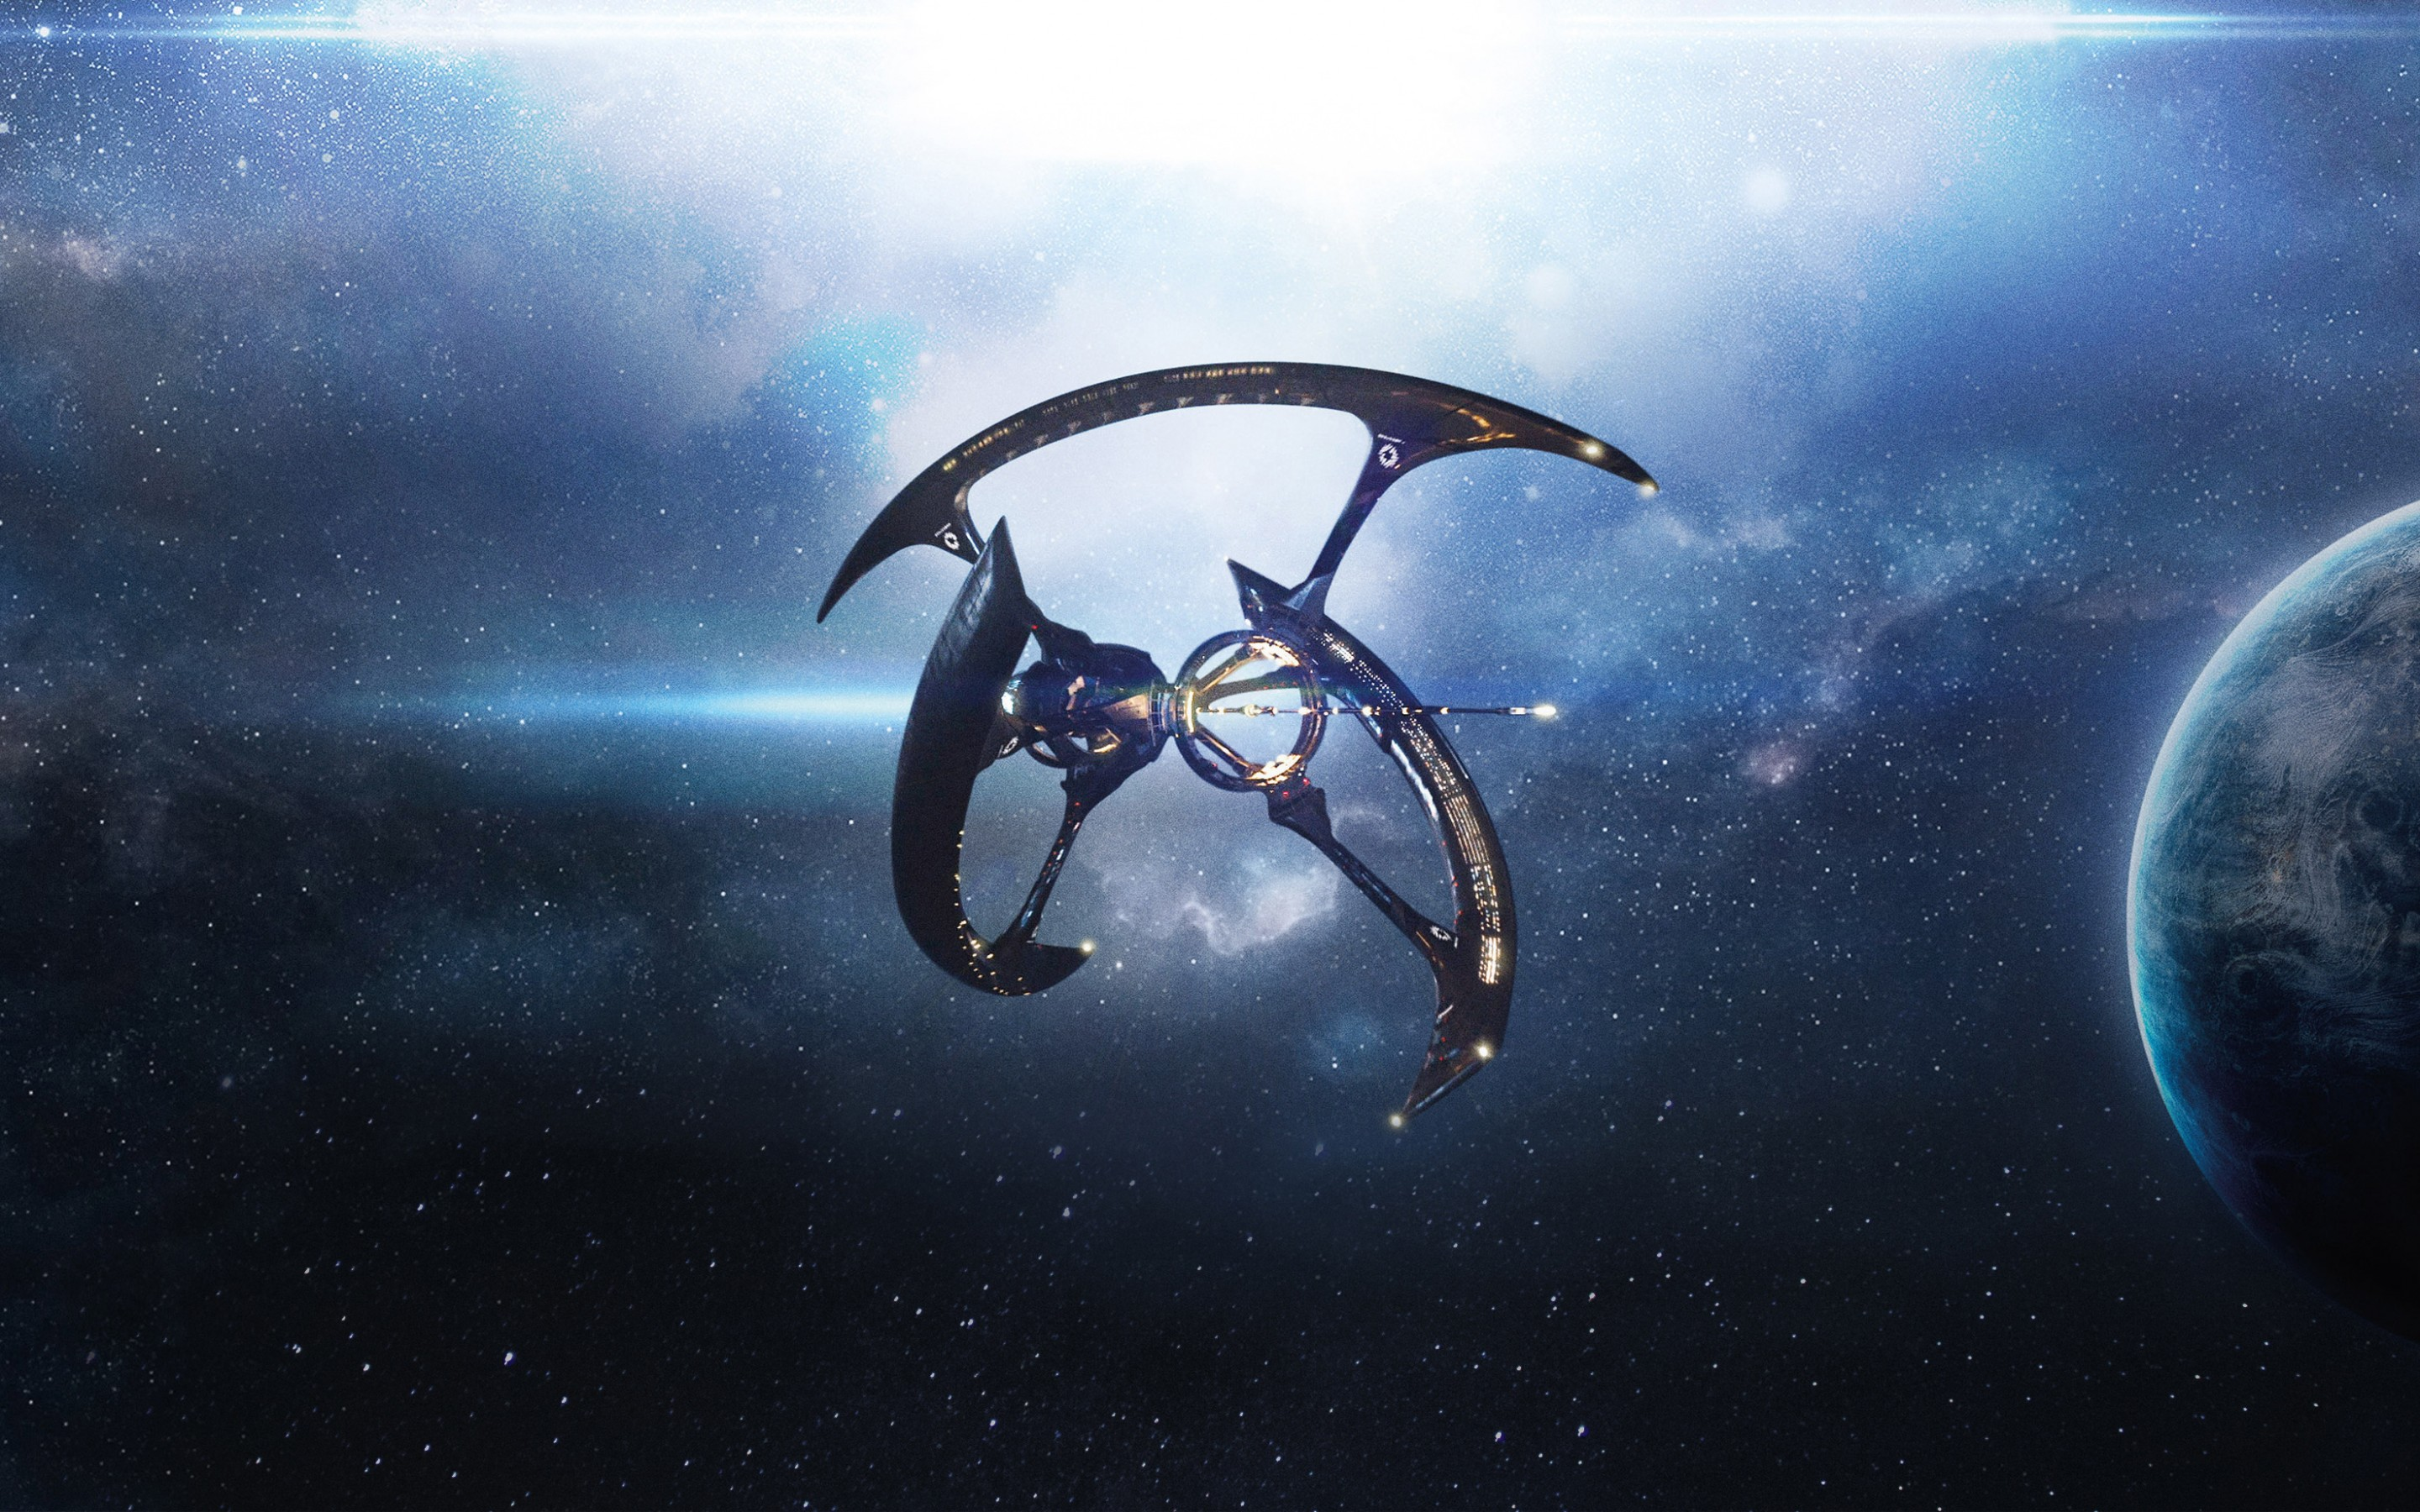

# Aufgabenstellung

- Raumschiff Titanic mit fast 13.000 Passagieren
- Kollision mit einer verborgenen Raumzeitanamolie: fast die Hälfte der Passagiere in eine andere Dimension transportiert!
- Ziel: vorherzusagen, ob ein Passagier in eine andere Dimension transportiert wurde

# Arbeitsumgebung
- Virtuelle Umgebung mit Python installieren
- Aktivieren dann Jupyter-Kernel installieren

- Core Libraries:
    - numpy
    - pandas
    - matplotlib
    - sklearn

# Inhalt
- Libraries
- Data
- Exploratory Data Analysis


In [17]:
# Import Libraries

from my_functions import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid', font_scale=1.4)

# 1. Importing Dataset

In [5]:
# Load training data
train = pd.read_csv('train.csv')

# Load test data
test = pd.read_csv('test.csv')

# Load sample submission data
sample = pd.read_csv('sample_submission.csv')

### Feature descriptions:
- PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always
- HomePlanet - The planet the passenger departed from, typically their planet of permanent residence
- CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage.Passengers in cryosleep are confined to their cabins
- Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard
- Destination - The planet the passenger will be debarking to
- Age - The age of the passenger
- VIP - Whether the passenger has paid for special VIP service during the voyage
- RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities
- Name - The first and last names of the passenger
- Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict

# Generic feature descriptions
## Categorical features
- A categorical feature is a type of feature that describes an attribute or characteristic of an object that can take on a limited set of values, typically represented as labels or categories
    - nominal: they have no inherent order or ranking (e.g. hair color)
    - ordinal: they have a natural order or ranking (e.g. educational level)
## Numerical features
- describes a quantitative attribute or characteristic of an object, typically represented as a number
    - continious: can take on any value within a certain range (e.g. temperature, height, weight)
    - discrete: can only take on a finite or countable set of values (e.g. age, number of children)

# Specific feature descriptions
## Categorical:
- nominal: PassengerID, HomePlanet, CryoSleep, Cabin, Destination, VIP, Name, Transported
- ordinal: /
## Numerical:
- continious: Age, RoomService, FoodCourt, ShoppingMall, Spa, VRDeck
- discrete: /

In [6]:
# Shape and preview
print('Train set shape:', train.shape)
print('Test set shape:', test.shape)
train.head()

Train set shape: (8693, 14)
Test set shape: (4277, 13)


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [27]:
# Missing values of training data
missing_values_table(train)

Dein Datensatz hat 14 Spalten.
Es gibt 12 Spalten mit missing values.


,Missing Values,% of Total Values
CryoSleep,217,2.5
ShoppingMall,208,2.4
VIP,203,2.3
HomePlanet,201,2.3
Name,200,2.3
Cabin,199,2.3
VRDeck,188,2.2
FoodCourt,183,2.1
Spa,183,2.1
Destination,182,2.1


In [28]:
# Missing values of test data
missing_values_table(test)

Dein Datensatz hat 13 Spalten.
Es gibt 12 Spalten mit missing values.


,Missing Values,% of Total Values
FoodCourt,106,2.5
Spa,101,2.4
Cabin,100,2.3
ShoppingMall,98,2.3
Name,94,2.2
CryoSleep,93,2.2
VIP,93,2.2
Destination,92,2.2
Age,91,2.1
HomePlanet,87,2.0


In [12]:
# Look for duplicates
print(f'Duplicates in train set: {train.duplicated().sum()}, ({np.round(100*train.duplicated().sum()/len(train),1)}%)')
print('')
print(f'Duplicates in test set: {test.duplicated().sum()}, ({np.round(100*test.duplicated().sum()/len(test),1)}%)')

Duplicates in train set: 0, (0.0%)

Duplicates in test set: 0, (0.0%)


In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [14]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


# 2. Exploratory Data Analysis

## Target Distribution

Text(0.5, 1.0, 'Target distribution')

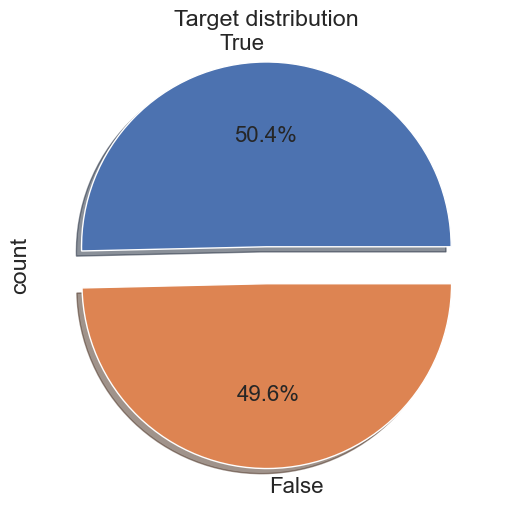

In [18]:
# Figure size
plt.figure(figsize=(6,6))

# Pie plot
train['Transported'].value_counts().plot.pie(explode=[0.1,0.1], autopct='%1.1f%%', shadow=True, textprops={'fontsize':16}).set_title("Target distribution")

## Numerical continious features

### Age

Text(0.5, 0, 'Age (years)')

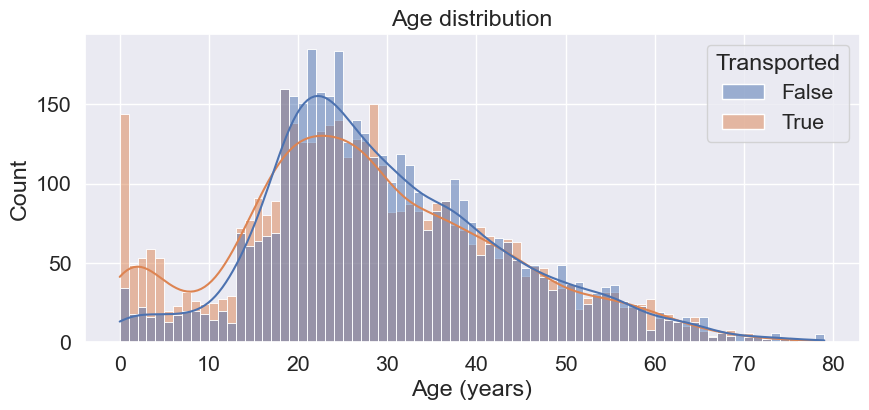

In [19]:
# Figure size
plt.figure(figsize=(10,4))

# Histogram
sns.histplot(data=train, x='Age', hue='Transported', binwidth=1, kde=True)

# Aesthetics
plt.title('Age distribution')
plt.xlabel('Age (years)')

Notes:

    0-18 year olds were more likely to be transported than not.
    18-25 year olds were less likely to be transported than not.
    Over 25 year olds were about equally likely to be transported than not.

Insight:

    Create a new feature that indicates whether the passanger is a child, adolescent or adult.

### 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'

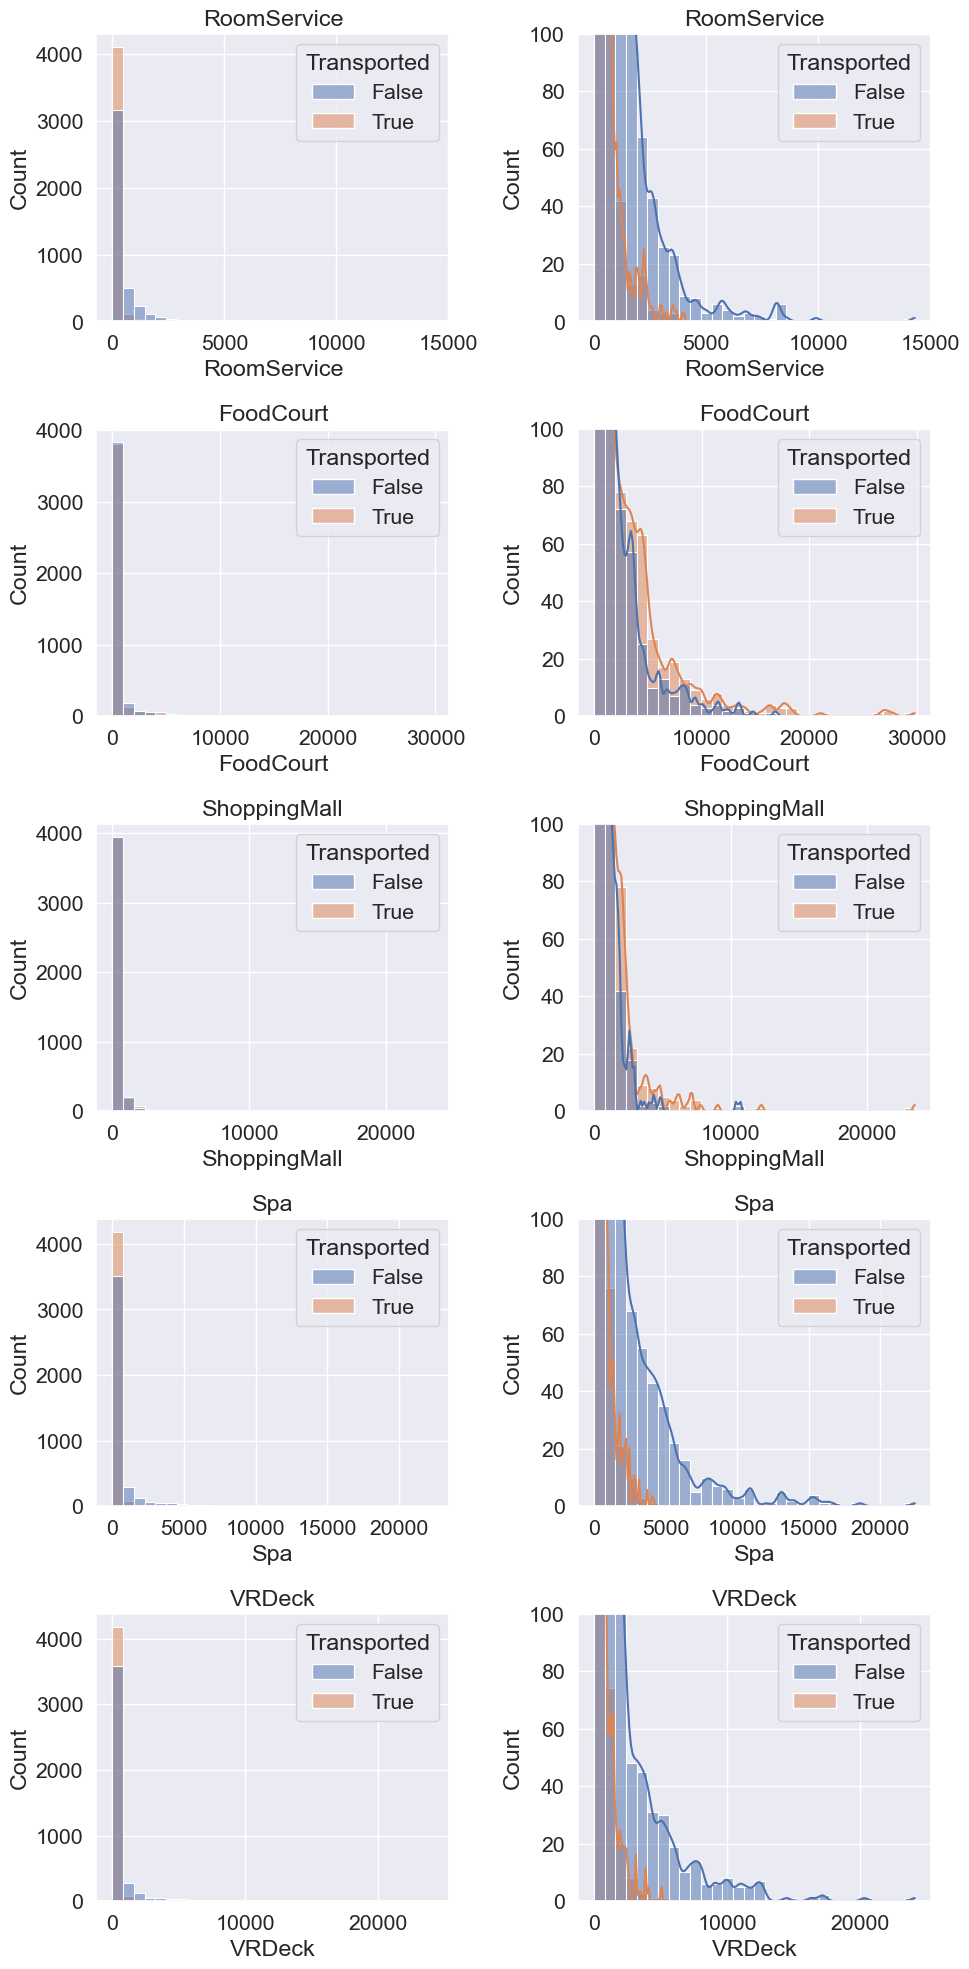

In [23]:
# Expenditure features
exp_feats=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# Plot expenditure features
fig=plt.figure(figsize=(10,20))
for i, var_name in enumerate(exp_feats):
    # Left plot
    ax=fig.add_subplot(5,2,2*i+1)
    sns.histplot(data=train, x=var_name, axes=ax, bins=30, kde=False, hue='Transported')
    ax.set_title(var_name)
    
    # Right plot (truncated)
    ax=fig.add_subplot(5,2,2*i+2)
    sns.histplot(data=train, x=var_name, axes=ax, bins=30, kde=True, hue='Transported')
    plt.ylim([0,100])
    ax.set_title(var_name)
fig.tight_layout()  # Improves appearance a bit
plt.show()

Notes:

    Most people don't spend any money (as we can see on the left).
    The distribution of spending decays exponentially (as we can see on the right).
    There are a small number of outliers.
    People who were transported tended to spend less.
    RoomService, Spa and VRDeck have different distributions to FoodCourt and ShoppingMall - we can think of this as luxury vs essential amenities.

Insight:

    Create a new feature that tracks the total expenditure across all 5 amenities.
    Create a binary feature to indicate if the person has not spent anything. (i.e. total expenditure is 0).
    Take the log transform to reduce skew.


## Categorical Nominal features
### 'HomePlanet', 'CryoSleep', 'Destination', 'VIP'

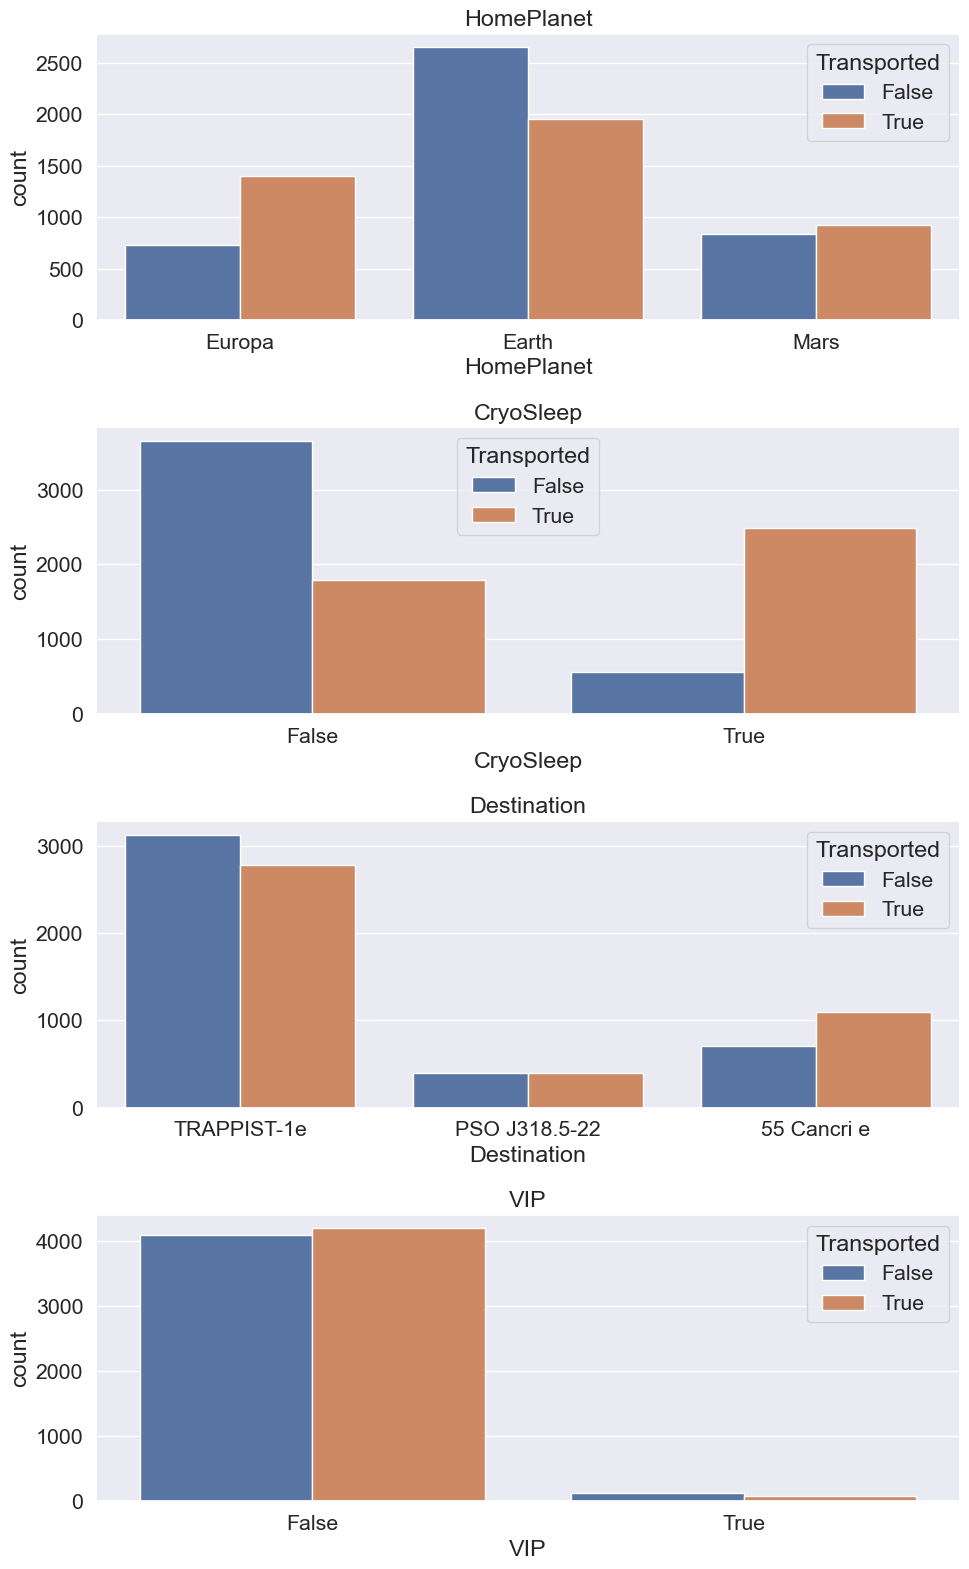

In [26]:
# Categorical features
cat_feats=['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

# Plot categorical features
fig=plt.figure(figsize=(10,16))
for i, var_name in enumerate(cat_feats):
    ax=fig.add_subplot(4,1,i+1)
    sns.countplot(data=train, x=var_name, axes=ax, hue='Transported')
    ax.set_title(var_name)
fig.tight_layout()  # Improves appearance a bit
plt.show()

Notes:

    VIP does not appear to be a useful feature; the target split is more or less equal.
    CryoSleep appears the be a very useful feature in contrast.

Insights:

    We might consider dropping the VIP column to prevent overfitting.

